In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import scikitplot as skplt
import datetime

###  Load data

In [127]:
attribute_train = pd.read_csv('https://disk.bg/s/UFQtiaqlTDj2SZX/download')  ### train data load
attribute_test = pd.read_csv('https://disk.bg/s/VYmtGL4lzcHdcCl/download')

#### Human activity basic explarations

In [3]:
attribute_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
attribute_train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


#### The data is appoximatly in same order.There is no need to apply standart scaller

In [5]:
# separating data inputs and output lables 
train_data  = attribute_train.drop('Activity' , axis=1).values
label_data = attribute_train['Activity'].values

train_data_test = attribute_test.drop('Activity' , axis=1).values
label_data_test = attribute_test['Activity'].values


print('train data ' ,train_data.shape)
print('label data ' ,label_data.shape)

print('train data test ' ,train_data_test.shape)
print('label_data_test' ,label_data_test.shape)

train data  (7352, 562)
label data  (7352,)
train data test  (2947, 562)
label_data_test (2947,)


In [6]:
svc = LinearSVC(C=1e9)

In [7]:
start = datetime.datetime.now()
svc.fit(train_data,label_data)
end = datetime.datetime.now()
delta = end - start
delta * 1000 # milliseconds

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


datetime.timedelta(seconds=6505, microseconds=626000)

In [10]:
svc.score(train_data_test,label_data_test)

0.9660671869697998

# LInear sVM score - 0.9613165931455717  C=1e9

In [44]:
np.array([svc.predict(label_data_test),label_data_test]).T

ValueError: could not convert string to float: 'STANDING'

In [12]:
#svc.predict(label_data_test)
label_data_test
np.array([svc.predict(train_data_test),label_data_test]).T

array([['STANDING', 'STANDING'],
       ['STANDING', 'STANDING'],
       ['STANDING', 'STANDING'],
       ...,
       ['WALKING_UPSTAIRS', 'WALKING_UPSTAIRS'],
       ['WALKING_UPSTAIRS', 'WALKING_UPSTAIRS'],
       ['WALKING_UPSTAIRS', 'WALKING_UPSTAIRS']], dtype=object)

### lets to make  radiues base kernel


In [13]:
kernel_svc = SVC(kernel="rbf")

In [14]:
kernel_svc.fit(train_data_test,label_data_test)

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
start = datetime.datetime.now()
kernel_svc.fit(train_data,label_data)
end = datetime.datetime.now()
delta = end - start
delta * 1000 # milliseconds

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


datetime.timedelta(seconds=7564, microseconds=391000)

In [16]:
kernel_svc.score(train_data_test,label_data_test)

0.9307770614183916

# Kenel SVM with tuning C=1e9

In [27]:
kernel_svc.fit(train_data,label_data)

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [28]:
kernel_svc.score(train_data_test,label_data_test)

0.9494401085850017

In [19]:
np.array([kernel_svc.predict(train_data_test),label_data_test]).T

array([['STANDING', 'STANDING'],
       ['STANDING', 'STANDING'],
       ['STANDING', 'STANDING'],
       ...,
       ['WALKING_UPSTAIRS', 'WALKING_UPSTAIRS'],
       ['WALKING_UPSTAIRS', 'WALKING_UPSTAIRS'],
       ['WALKING_UPSTAIRS', 'WALKING_UPSTAIRS']], dtype=object)

##### Kernel SVM with C=1e9 make 100% acurancy
### Cross VAlidation

In [21]:
param_grid = {'C':[1,10,1e9]} ##  'kernel':['linear','rbf'] 'gamma':[1,0.1,0.001,0.0001]
grid = GridSearchCV(SVC(kernel="rbf"),param_grid)
grid.fit(train_data,label_data)

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0

{'C': 10}
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [23]:
grid.best_params_

{'C': 10}

In [25]:
kernel_svc = SVC(kernel="rbf",C=10)

kernel_svc.fit(train_data,label_data)


D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [26]:
kernel_svc.score(train_data_test,label_data_test)

0.9494401085850017

In [31]:
 ##### PCA  LEts to apply dimensialy reduction algoritm PCA
    

pca = PCA()
pca.fit(train_data)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

(array([558.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([2.49526843e-35, 2.02907295e+00, 4.05814589e+00, 6.08721884e+00,
        8.11629179e+00, 1.01453647e+01, 1.21744377e+01, 1.42035106e+01,
        1.62325836e+01, 1.82616565e+01, 2.02907295e+01, 2.23198024e+01,
        2.43488754e+01, 2.63779483e+01, 2.84070213e+01, 3.04360942e+01,
        3.24651672e+01, 3.44942401e+01, 3.65233130e+01, 3.85523860e+01,
        4.05814589e+01, 4.26105319e+01, 4.46396048e+01, 4.66686778e+01,
        4.86977507e+01, 5.07268237e+01, 5.27558966e+01, 5.47849696e+01,
        5.68140425e+01, 5.88431155e+01, 6.08721884e+01, 6.29012614e+01,
        6.49303343e+01, 6.69594072e+01, 6.89884802e+01, 7.10175531e+01,
        7.30466261e+01, 7.50756990e+01, 7.71047720e+01, 7.91338449e+01,
      

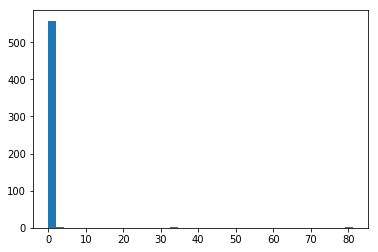

In [32]:
explained_variance = pca.explained_variance_
plt.hist(explained_variance,bins=40)

In [53]:
print('min value of variance ' ,explained_variance.min())
print('max value of variance ' ,explained_variance.max())
print('std of variance array ' ,explained_variance.std())

min value of variance  2.4952684324688794e-35
max value of variance  81.16291787638767
std of variance array  3.713017495770375


In [128]:
# PCA in 2D projection
 
skplt.decomposition.plot_pca_2d_projection(pca, train_data, label_data)

AttributeError: module 'scikitplot.decomposition' has no attribute 'plot_pca_3d_projection'

(array([417.,  34.,  24.,  16.,   9.,   8.,   4.,   5.,   4.,   3.,   4.,
          1.,   2.,   3.,   2.,   2.,   1.,   1.,   1.,   2.,   1.,   2.,
          1.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([2.49526843e-35, 1.19412599e-02, 2.38825197e-02, 3.58237796e-02,
        4.77650395e-02, 5.97062994e-02, 7.16475592e-02, 8.35888191e-02,
        9.55300790e-02, 1.07471339e-01, 1.19412599e-01, 1.31353859e-01,
        1.43295118e-01, 1.55236378e-01, 1.67177638e-01, 1.79118898e-01,
        1.91060158e-01, 2.03001418e-01, 2.14942678e-01, 2.26883938e-01,
        2.38825197e-01, 2.50766457e-01, 2.62707717e-01, 2.74648977e-01,
        2.86590237e-01, 2.98531497e-01, 3.10472757e-01, 3.22414017e-01,
        3.34355276e-01, 3.46296536e-01, 3.58237796e-01, 3.70179056e-01,
        3.82120316e-01, 3.94061576e-01, 4.06002836e-01, 4.17944095e-01,
        4.29885355e-01, 4.41826615e-01, 4.53767875e-01, 4.65709135e-01,
      

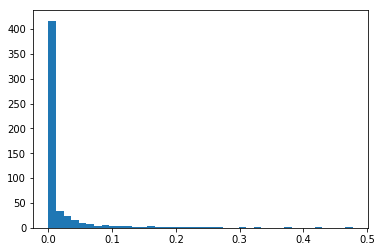

In [73]:
                                                                                                             
explained_variancel_less_then_10 = explained_variance[explained_variance<0.5]
explained_variancel_less_then_10
plt.hist(explained_variancel_less_then_10,bins=40)

In [34]:
explained_variance.astype(int)

array([81, 34,  2,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

23

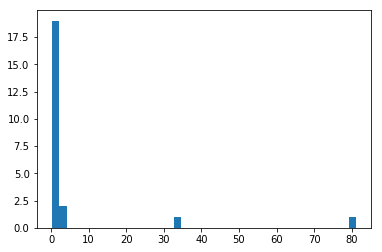

In [80]:
explained_variancel_less_then_10 = explained_variance[explained_variance>0.2]
explained_variancel_less_then_10
plt.hist(explained_variancel_less_then_10,bins=40)
explained_variancel_less_then_10.size

#### PCA component 23

In [79]:
tranformed_data_train = pca.transform(train_data)
tranformed_data_test= pca.transform(train_data_test)

tranformed_data_train = tranformed_data_train[:,:23]
tranformed_data_test = tranformed_data_test[:,:23]

kernel_svc = SVC(kernel="rbf")
#kernel_svc.fit(tranformed_data_train,tranformed_data_test)
kernel_svc.fit(tranformed_data_train,label_data)

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [69]:
kernel_svc.score(tranformed_data_test,label_data_test)

0.850356294536817

In [35]:
tranformed_data_train = pca.transform(train_data)
tranformed_data_test= pca.transform(train_data_test)

tranformed_data_train = tranformed_data_train[:,:5]
tranformed_data_test = tranformed_data_test[:,:5]

### C: 1000  Hyperparameter tuning using grid search and cross validation

In [108]:
kernel_svc = SVC(kernel="rbf",C=1000,gamma=0.00001)
kernel_svc.fit(tranformed_data_train,label_data)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [109]:
kernel_svc.score(tranformed_data_test,label_data_test)

0.9077027485578555

# Make a component Analysis to chosses beterr choice

In [36]:
print(train_data.shape)
print(train_data_test.shape)


print(tranformed_data_train.shape)
print(tranformed_data_test.shape)

print()

(7352, 562)
(2947, 562)
(7352, 5)
(2947, 5)


In [42]:
kernel_svc = SVC(kernel="rbf")
#kernel_svc.fit(tranformed_data_train,tranformed_data_test)
kernel_svc.fit(tranformed_data_train,label_data)

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [43]:
kernel_svc.score(tranformed_data_test,label_data_test)

0.6976586359009161

In [46]:
svc = LinearSVC(C=1e9)
svc.fit(tranformed_data_train,label_data)

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [47]:
svc.score(tranformed_data_test,label_data_test)

0.6080760095011877

In [48]:
param_grid = {'C':[1,10,100,1e9],'kernel':['linear','rbf'],'gamma':[1,0.1,0.001,0.0001]} ##  'kernel':['linear','rbf'] 'gamma':[1,0.1,0.001,0.0001]
grid = GridSearchCV(SVC(kernel="rbf"),param_grid)
grid.fit(train_data,label_data)


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


KeyboardInterrupt: 

In [ ]:

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

In [ ]:
pca = PCA(n_components = 21)
pca.fit(train_data,)

In [ ]:
tranformed_data_train = pca.transform(train_data)
tranformed_data_test= pca.transform(train_data_test)

tranformed_data_train = tranformed_data_train[:,:23]
tranformed_data_test = tranformed_data_test[:,:23]

ValueError: operands could not be broadcast together with shapes (7352,5) (562,) 

In [ ]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [100, 1000]}]

In [ ]:
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(tranformed_data_train,label_data)